# Clustering and PCA

In this assignment, you will be exploring difference between clique and kmeans algorithms for clustering and will get better understanding of PCA & Kmeans algorithms by manually implementing both of them.

--------------------

In [58]:
!pip install pyclustering

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [59]:
from sklearn.datasets import make_moons, make_blobs
import numpy as np
import pandas as pd
from pyclustering.cluster.clique import clique, clique_visualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [60]:
X, y = make_moons(n_samples=250, noise=0.05, random_state=42)

# Question 1
Scatter plot the dataset

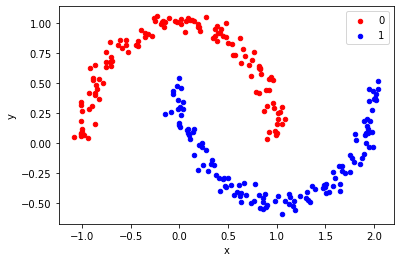

In [61]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from matplotlib import pyplot
from pandas import DataFrame

# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

# Question 2
In your opinon, how well will K-Means perform on the above dataset? Explain.

## Answer: Because the density spread of data points across the data space is different and the data points follow non-convex or spherical shapes

# Question 3
1. Use Elbow method to find best "k". (Use inertia as metric).
2. Plot the elbow graph.
3. Train KMeans model using "k = 2".
4. Comment on the results.

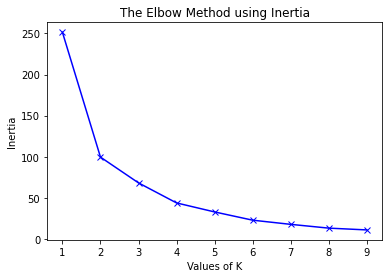

In [62]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

for k in K:
	# Building and fitting the model
	kmeanModel = KMeans(n_clusters=k).fit(X)
	kmeanModel.fit(X)

	distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / X.shape[0])
	inertias.append(kmeanModel.inertia_)

	mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / X.shape[0]
	mapping2[k] = kmeanModel.inertia_


plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

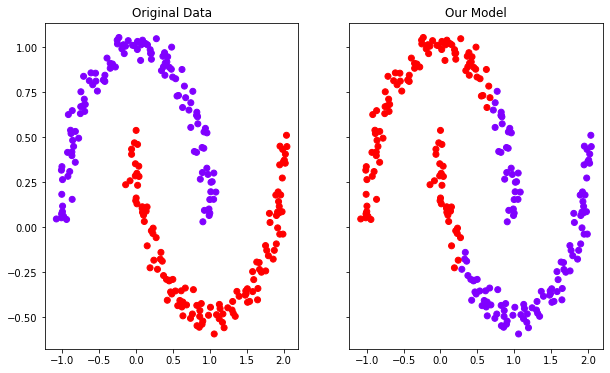

In [63]:
kmeanModel_2 = KMeans(n_clusters=2).fit(X)
#print(kmeanModel_2.labels_)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))

ax1.set_title('Original Data')
ax1.scatter(X[:,0], X[:,1],c=y,cmap='rainbow')

ax2.set_title('Our Model')
ax2.scatter(X[:,0], X[:,1],c=kmeanModel_2.labels_ ,cmap='rainbow')



## Answer: The Kmeans didnt perform well, Because the density spread of data points across the data space is different and the data points follow non-convex or spherical shapes

# Question 4
1. If you are going to use clique, what is a proper threshold value for the above dataset.
2. Find the best interval value that cluster the data into two clusters, plot the results.
3. Why do you think clique performed better on this dataset in comparison with KMeans?

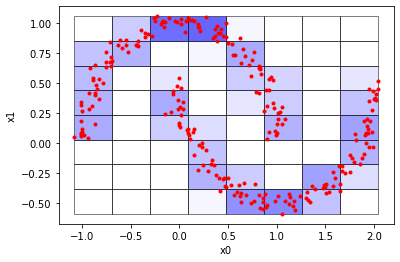

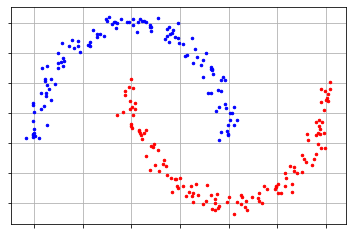

Number of clusters: in Clique 2


In [64]:
from pyclustering.cluster.clique import clique, clique_visualizer
from pyclustering.utils import read_sample
from pyclustering.samples.definitions import FCPS_SAMPLES
data = X

# create CLIQUE algorithm for processing
intervals = 8  # defines amount of cells in grid in each dimension
threshold = 0   # lets consider each point as non-outlier

clique_instance = clique(data, intervals, threshold)
# start clustering process and obtain results
clique_instance.process()
clusters = clique_instance.get_clusters()  # allocated clusters
noise = clique_instance.get_noise()     # points that are considered as outliers (in this example should be empty)
cells = clique_instance.get_cells()     # CLIQUE blocks that forms grid
# visualize clustering results
clique_visualizer.show_grid(cells, data)    # show grid that has been formed by the algorithm
clique_visualizer.show_clusters(data, clusters, noise)  # show clustering results
print("Number of clusters: in Clique", len(clusters))

Comment: The clique is better in dividing the close neighbouring data so it can solve the problem of noisy data and outliers by dividing the space into a grid or blocks with thershold value to it can cluster the neigbouring values to unique cluster but k-means affected by the changing of size in data so it is affected by outliers

# Question 5
For the following dataset
1. Run kmeans algorithm clustering using k=2.
2. Run clique algorithm using interval = 15 and threshold = 6.
3. Plot results of both algorithms.
4. Comment on the following
    * What is the number of clusters in case of clique? and why?
    * Why do kmeans fail to cluster such data?

In [65]:
n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state, centers=2)
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)

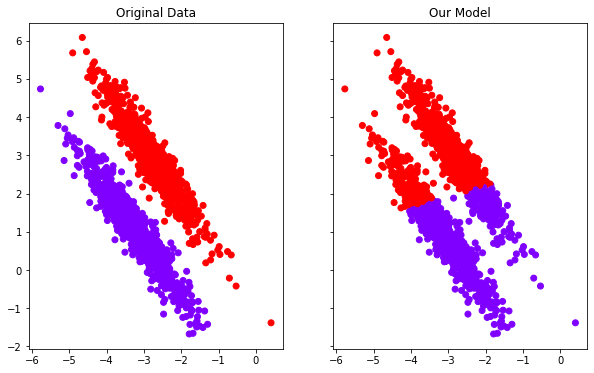

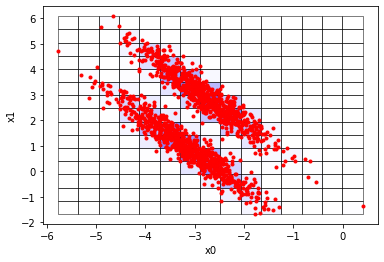

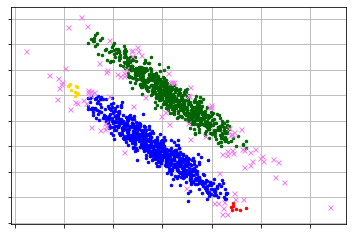

Number of clusters: in Clique 4


In [66]:
X = X_aniso
kmeanModel_2_aniso = KMeans(n_clusters=2).fit(X)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))

ax1.set_title('Original Data')
ax1.scatter(X[:,0], X[:,1],c=y,cmap='rainbow')

ax2.set_title('Our Model')
ax2.scatter(X[:,0], X[:,1],c=kmeanModel_2_aniso.labels_ ,cmap='rainbow')
################################################################################
from pyclustering.cluster.clique import clique, clique_visualizer
from pyclustering.utils import read_sample
from pyclustering.samples.definitions import FCPS_SAMPLES
data = X
# create CLIQUE algorithm for processing
intervals = 15  # defines amount of cells in grid in each dimension
threshold = 6   # lets consider each point as non-outlier
clique_instance = clique(data, intervals, threshold)
# start clustering process and obtain results
clique_instance.process()
clusters = clique_instance.get_clusters()  # allocated clusters
noise = clique_instance.get_noise()     # points that are considered as outliers (in this example should be empty)
cells = clique_instance.get_cells()     # CLIQUE blocks that forms grid
# visualize clustering results
clique_visualizer.show_grid(cells, data)    # show grid that has been formed by the algorithm
clique_visualizer.show_clusters(data, clusters, noise)  # show clustering results
print("Number of clusters: in Clique", len(clusters))

Number of clusters is 4 because some neighbouring cells have data with points less than 6

K-means with this data can not noise data and outliers and can not know clusters with non-convex or spherical shape and it is the best in spherical data

# Question 6

Write your own PCA function that will return:
* The sorted eigenvectors of principal components
* The corresponding eigenvalues
* The transformed data

Note, please make sure that the data is centered before transformation (i.e., the sample
mean subtracted out) but not normalized.

In [67]:
# Centering before transformation
X_meaned = X - np.mean(X , axis = 0)
cov_mat = np.cov(X_meaned , rowvar = False)
eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
sorted_index = np.argsort(eigen_values)[::-1]

# Sort the eigenvectors 
sorted_eigenvectors = eigen_vectors[:,sorted_index]
print("Sorted eigenvectors\n",sorted_eigenvectors)
print()

# Similarly sort the eigenvectors 
sorted_eigenvalue = eigen_values[sorted_index]
print("Sorted eigenvalues\n",sorted_eigenvalue)
print()

n_components = 2 #you can select any number of components.
eigenvector_subset = sorted_eigenvectors[:,0:n_components]

#Transform the data 
X_reduced = np.dot(eigenvector_subset.transpose(),X_meaned.transpose()).transpose()
print("Transformed data\n",X_reduced)

Sorted eigenvectors
 [[-0.30277297 -0.95306271]
 [ 0.95306271 -0.30277297]]

Sorted eigenvalues
 [2.18718252 0.39229654]

Transformed data
 [[-0.57402478 -1.00927032]
 [ 0.50547948 -0.69661361]
 [ 0.3880184   0.86607569]
 ...
 [-0.87532547 -0.95482281]
 [ 1.21833234 -0.28118517]
 [-1.78795653  0.14244246]]


# Question 7
Write your own K-means clustering, where the Euclidian distance is used to evaluate
the distance/ similarity between the dataset. The input to this function should be:
* The number of clusters
* The dataset

The output should be:
* The list of cluster centers

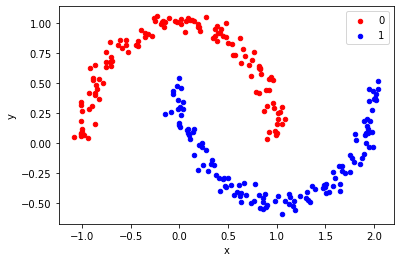

In [68]:
X, y = make_moons(n_samples=250, noise=0.05, random_state=42)
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from matplotlib import pyplot
from pandas import DataFrame

# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

In [69]:
import random
from math import sqrt
import matplotlib.pyplot as plt

def KMeans(NumClusters,data,iterations):
  randPoints = []
  distances = []
  clusters = [[] for i in range(0,NumClusters)]
  centers = [] 

  for i in range(0,NumClusters):
    randPoints.append(random.choice(data))

  ## Iterate until iterations equal zero
  while iterations !=0:
    for i in data:
      for j in randPoints:
          distances.append(sqrt( (i[0]-j[0])**2 + ( (i[1]-j[1])**2 ) ))
      #print(distances)
      clusters[distances.index(min(distances))].append(i)
      #clusters.append(distances.index(min(distances)))
      distances = [] 

    # Calculate the clusters centers
    for i in clusters:
      average = [sum(x)/len(x) for x in zip(*i)]
      centers.append(average)
 
    randPoints = []
    # Assign old clusters centers as the new randomPoints
    randPoints = centers
    centers = []
    iterations = iterations-1  
      
    return randPoints


mine = KMeans(2,X,300)
print("Clusters centers\n",mine)


Clusters centers
 [[-0.39163117187434104, 0.7148179414433982], [0.9641601894940426, 0.013499962972494456]]


## As we see the clusters centers are near perfect from the graph above